In [454]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [455]:
# Load the dataset
file_path = 'data.csv'
data = pd.read_csv(file_path)

In [456]:
data

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [457]:
# check the length and shape of the data
print(f"There are {len(data)} rows in the dataset.")
print(f"Shape of Data is {data.shape}",) # >>> (rows , columns)

There are 4600 rows in the dataset.
Shape of Data is (4600, 18)


In [458]:
# remove the columns that are not in number
columns_to_remove = ['date', 'street','waterfront' , 'statezip', 'country']
data = data.drop(columns=columns_to_remove)

In [459]:
data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city
0,3.130000e+05,3.0,1.50,1340,7912,1.5,0,3,1340,0,1955,2005,Shoreline
1,2.384000e+06,5.0,2.50,3650,9050,2.0,4,5,3370,280,1921,0,Seattle
2,3.420000e+05,3.0,2.00,1930,11947,1.0,0,4,1930,0,1966,0,Kent
3,4.200000e+05,3.0,2.25,2000,8030,1.0,0,4,1000,1000,1963,0,Bellevue
4,5.500000e+05,4.0,2.50,1940,10500,1.0,0,4,1140,800,1976,1992,Redmond
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,3.081667e+05,3.0,1.75,1510,6360,1.0,0,4,1510,0,1954,1979,Seattle
4596,5.343333e+05,3.0,2.50,1460,7573,2.0,0,3,1460,0,1983,2009,Bellevue
4597,4.169042e+05,3.0,2.50,3010,7014,2.0,0,3,3010,0,2009,0,Renton
4598,2.034000e+05,4.0,2.00,2090,6630,1.0,0,3,1070,1020,1974,0,Seattle


In [460]:
# check the length and shape of the data
print(f"There are {len(data)} rows in the dataset.")
print(f"Shape of Data is {data.shape}",) # >>> (rows , columns)

There are 4600 rows in the dataset.
Shape of Data is (4600, 13)


In [461]:
# convert objects to category using Label Encoder

#code categorical data
label = LabelEncoder()
data['city'] = label.fit_transform(data['city'])

In [462]:
# to check the duplication in out text
total_duplicate_titles = sum(data.duplicated())
print(f"\nThere are {total_duplicate_titles} duplicate data.")


There are 0 duplicate data.


In [463]:
# Count the missing values in each column
missing_count = data.isnull().sum()
# Display columns with missing values
print("Columns with Missing Values:")
print(missing_count[missing_count > 0])

Columns with Missing Values:
Series([], dtype: int64)


In [464]:
# # # finding the outliers in our data
# clf = IsolationForest(contamination=0.01)
# outliers = clf.fit_predict(data) == -1
# outliers

In [465]:
# # # Identify the indices of the rows containing outliers
# outlier_indices = data.index[outliers]
# # Remove the rows with outliers
# data = data.drop(outlier_indices)


In [466]:
# check the length and shape of the data
print(f"There are {len(data)} rows in the dataset after removing the outliers.")
print(f"Shape of Data is {data.shape}",) # >>> (rows , columns)

There are 4600 rows in the dataset after removing the outliers.
Shape of Data is (4600, 13)


In [467]:
# Our data set  <<Features>> <<Labels>>
x = data.iloc[:, 1:data.shape[1]]
y = data.iloc[:, 0]
len(x), len(y)

(4600, 4600)

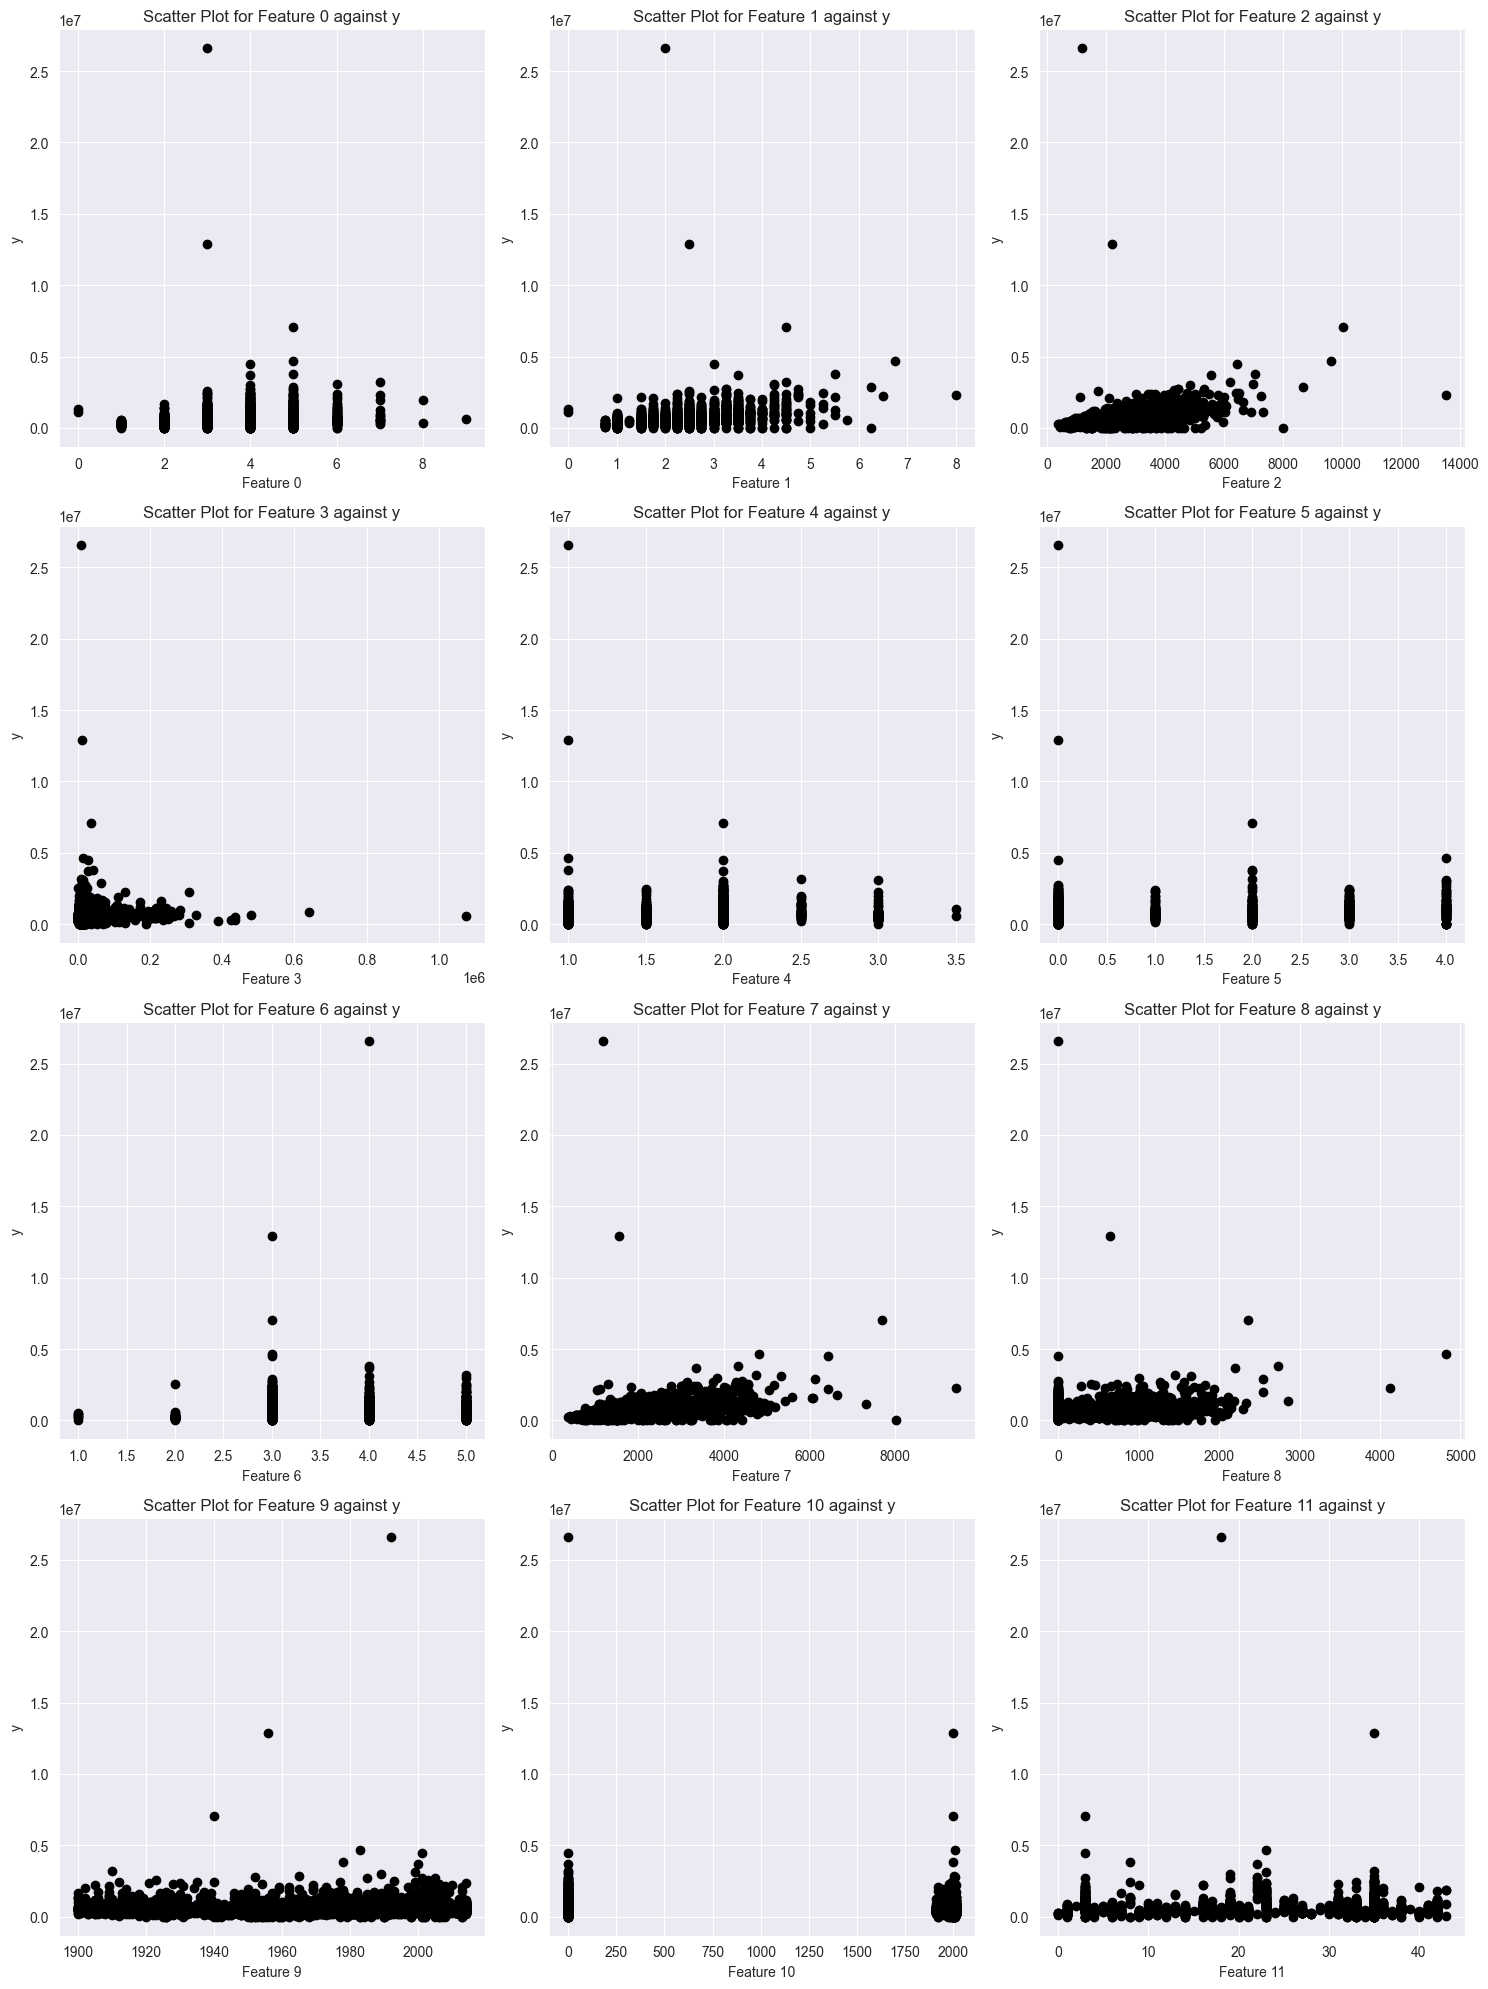

In [468]:
num_features = x.shape[1]

# Determine the number of rows and columns for subplots
num_rows = int(np.ceil(num_features / 3))
num_cols = min(num_features, 3)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))
axes = axes.flatten()

# Loop through each column and plot the scatter plot in the corresponding subplot
for feature_index, ax in enumerate(axes):
    if feature_index < num_features:
        chosen_feature = x.iloc[:, feature_index]

        ax.scatter(chosen_feature, y, color='black')
        ax.set_xlabel(f'Feature {feature_index}')
        ax.set_ylabel('y')
        ax.set_title(f'Scatter Plot for Feature {feature_index} against y')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


In [469]:
# Columns which you want to show on the graph
chosen_feature_index = 0

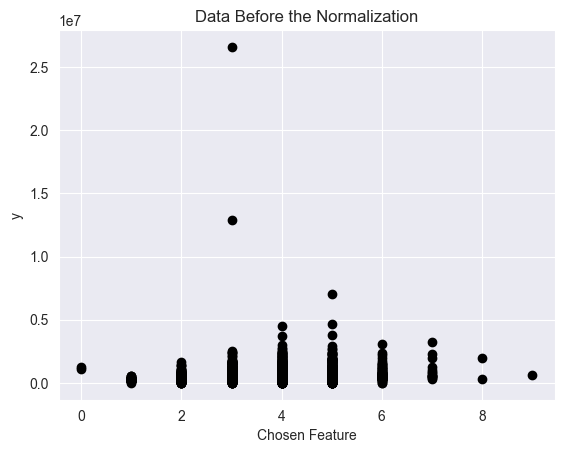

In [470]:
# Choose a specific feature from x data  (e.g., the first feature)
chosen_feature = x.iloc[:, chosen_feature_index]

plt.scatter(chosen_feature, y, color='black')
plt.xlabel('Chosen Feature')
plt.ylabel('y')
plt.title('Data Before the Normalization')
plt.show()


In [471]:
# standardize/ Normalize the data
scaler = StandardScaler()
x = scaler.fit_transform(x)
x

array([[-0.44112227, -0.84320364, -0.82997105, ..., -0.53101376,
         1.22167046,  0.8618055 ],
       [ 1.75970468,  0.43280154,  1.56852826, ..., -1.67469295,
        -0.82569345,  0.77834292],
       [-0.44112227, -0.20520105, -0.21736733, ..., -0.1609999 ,
        -0.82569345, -0.64052081],
       ...,
       [-0.44112227,  0.43280154,  0.90400897, ...,  1.2854179 ,
        -0.82569345,  0.5279552 ],
       [ 0.6592912 , -0.20520105, -0.05123751, ...,  0.10810108,
        -0.82569345,  0.77834292],
       [-0.44112227,  0.43280154, -0.67422434, ...,  0.64630305,
        -0.82569345, -1.39168397]])

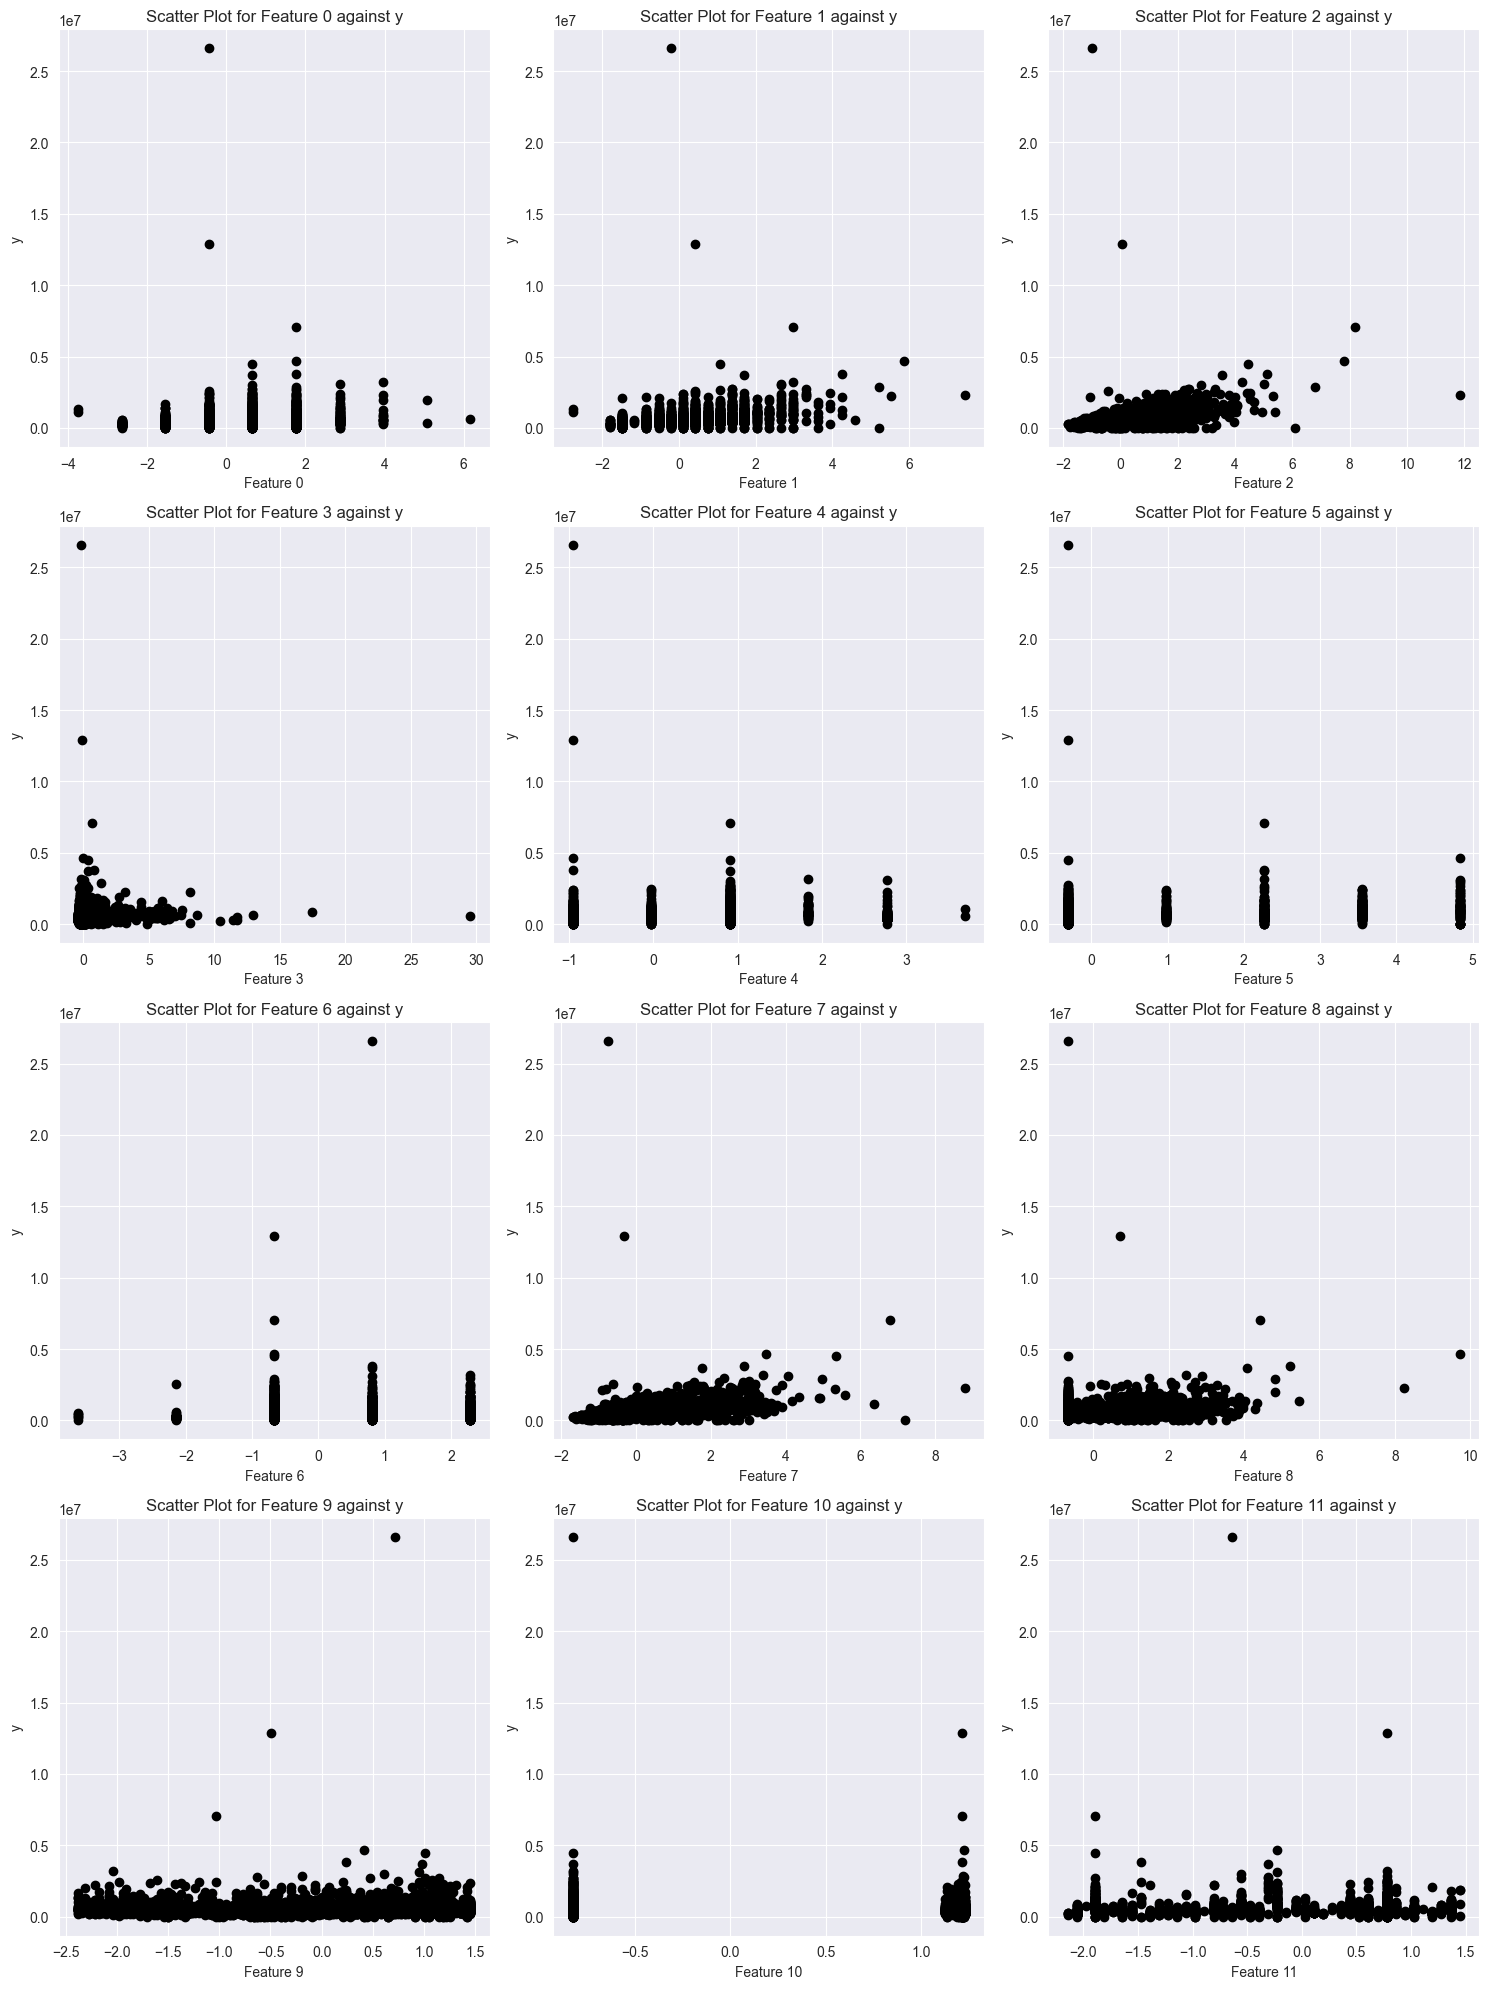

In [472]:
num_features = x.shape[1]

# Determine the number of rows and columns for subplots
num_rows = int(np.ceil(num_features / 3))
num_cols = min(num_features, 3)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))
axes = axes.flatten()

# Loop through each column and plot the scatter plot in the corresponding subplot
for feature_index, ax in enumerate(axes):
    if feature_index < num_features:
        chosen_feature = x[:, feature_index]

        ax.scatter(chosen_feature, y, color='black')
        ax.set_xlabel(f'Feature {feature_index}')
        ax.set_ylabel('y')
        ax.set_title(f'Scatter Plot for Feature {feature_index} against y')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


In [473]:
# Split the data into train and test
xTrain, xTest, yTrain, yTest = train_test_split(x,y,random_state=14,test_size=0.2)
len(xTrain), len(yTrain), len(xTest), len(yTest)

(3680, 3680, 920, 920)

In [474]:
# Train the model
model = LinearRegression()
model.fit(xTrain, yTrain)

LinearRegression()

In [475]:
# Prediction on the Test data
yPred = model.predict(xTest)


In [476]:
# Finding the mean squared error
mae = mean_absolute_error(yTest, yPred)
print(f'Mean Absolute Error: {mae}')

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(yTest, yPred)
print(f'Mean Squared Error: {mse}')

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')

Mean Absolute Error: 154488.58885436927
Mean Squared Error: 55862042177.597626
Root Mean Squared Error: 236351.52247784997


In [477]:
sc=model.score(xTest,yTest)
sc

0.5818306432548579

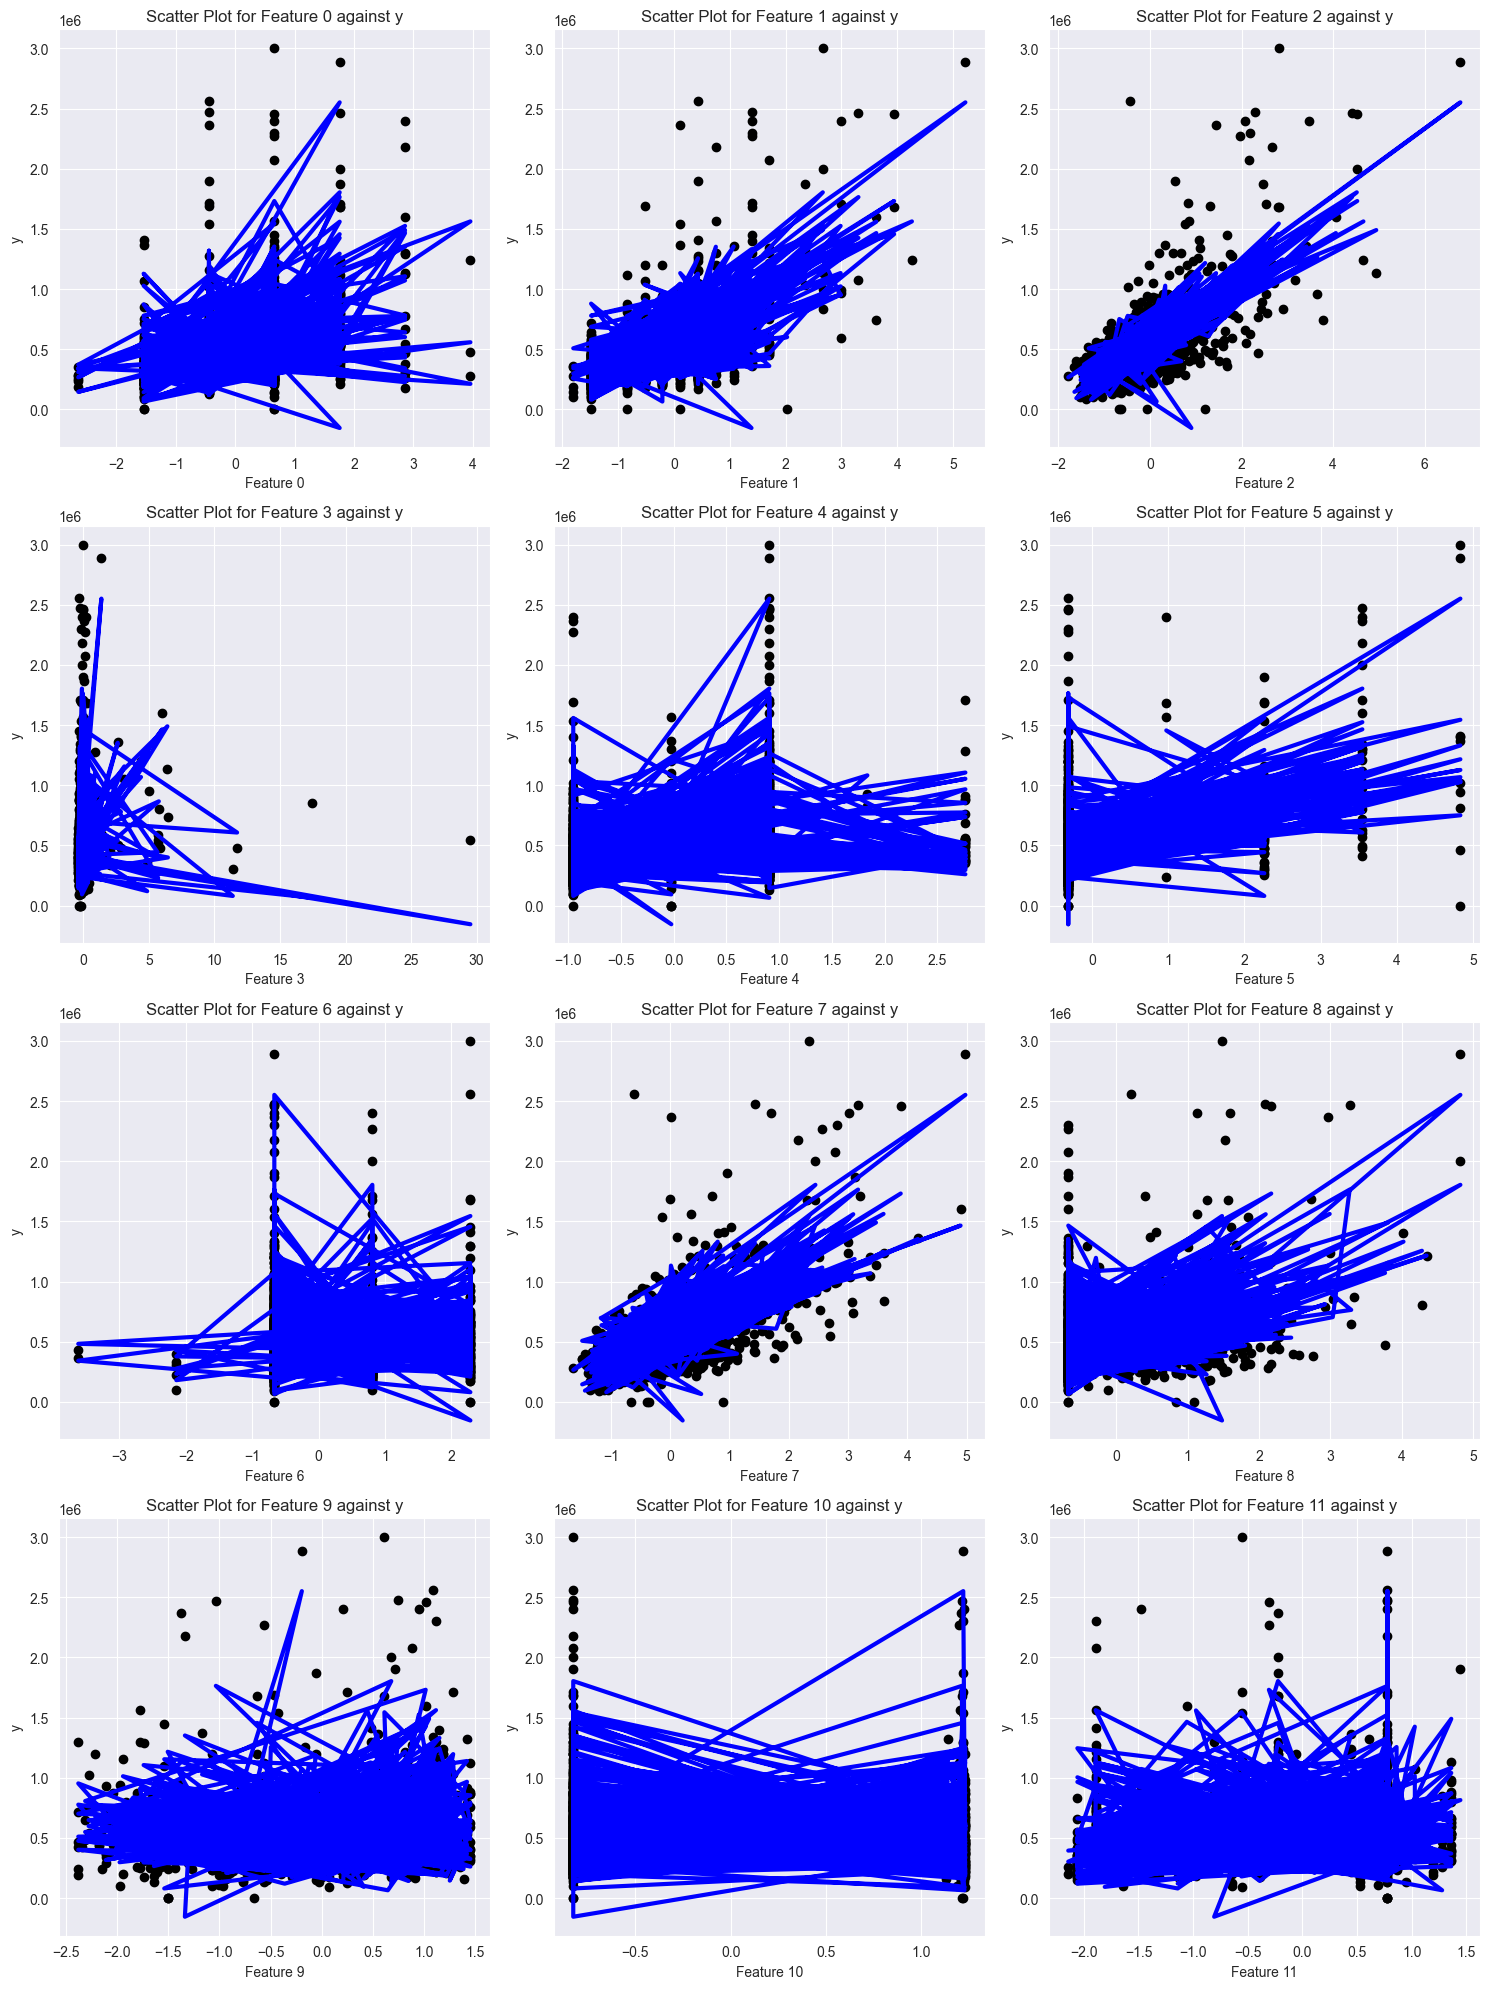

In [478]:
num_features = x.shape[1]

# Determine the number of rows and columns for subplots
num_rows = int(np.ceil(num_features / 3))
num_cols = min(num_features, 3)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))
axes = axes.flatten()

# Loop through each column and plot the scatter plot in the corresponding subplot
for feature_index, ax in enumerate(axes):
    if feature_index < num_features:
        chosen_feature = xTest[:, feature_index]

        ax.scatter(chosen_feature, yTest, color='black')
        ax.plot(chosen_feature, yPred, color='blue', linewidth=3)
        ax.set_xlabel(f'Feature {feature_index}')
        ax.set_ylabel('y')
        ax.set_title(f'Scatter Plot for Feature {feature_index} against y')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


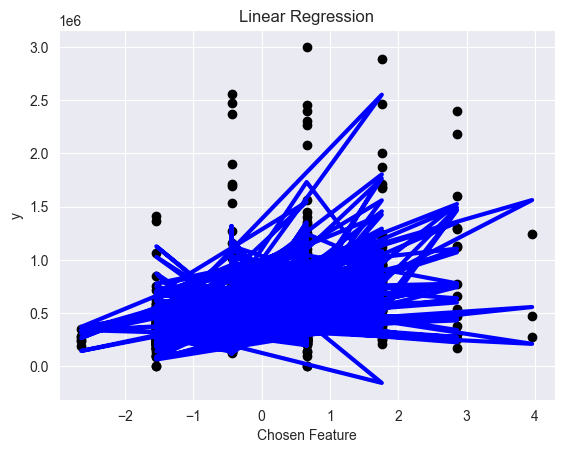

In [479]:
# Choose a specific feature from xTest (e.g., the first feature)
chosen_feature = xTest[:, chosen_feature_index]

# Plot the regression line
plt.scatter(chosen_feature, yTest, color='black')
plt.plot(chosen_feature, yPred, color='blue', linewidth=3)
plt.xlabel('Chosen Feature')
plt.ylabel('y')
plt.title('Linear Regression')
plt.show()


In [480]:
x.shape

(4600, 12)

In [481]:
sc=model.score(xTest,yTest)
sc

0.5818306432548579